# Some Simple TensorFlow Exercises

In class, we'll discuss some of the differences between PyTorch and TensorFlow.

The examples below will give you exposure to TensorFlow at the simplest level.

If you intend to work more with TensorFlow, I recommend these resources:
- [Aymeric Damien's Simple Examples](https://github.com/aymericdamien/TensorFlow-Examples). These are very simple examples that are designed to get key concepts across.
- [Keras](https://keras.io/). Keras is a high-level library that's built *on top of* TensorFlow (with support for other backends, too). It makes using TensorFlow much easier and much less error-prone. Also, in 2017, TensorFlow officially adopted Keras, so that fork of Keras is now officially supported.
- [TensorFlow Eager](https://research.googleblog.com/2017/10/eager-execution-imperative-define-by.html). We'll see that one of the main differences between PyTorch and TensorFlow is that, in PyTorch, computation graphs are formed *on the fly*, as computationed are peformed. In contrast, in TensorFlow, computation graphs are fully defined before they are ever run. The dynamic approach has many advantages (and some disadvantages), which we'll discuss in class. TensorFlow Eager, introduced in late 2017, aims to bring dynamic computation graphs to TensorFlow.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [8]:
tf.reset_default_graph()

x = [1,2,3,4]
y = [1,2,3,5]
z = tf.equal(x,y)


**Add code in the following cell to print `z`.**

In [9]:
print(z)

Tensor("Equal:0", shape=(4,), dtype=bool)


**In the following Markdown Cell, answer: What is the output of the print statement? Why are you seeing "add" here?**

The output shows that z is a tensor. 

We see add here because z is a sum of x**2 and y. It can be thought of as a function that will be executed once it is run during the session. The "function" here is an add operation only.

Let's instantiate a TensorFlow Session, *run* our computation graph, and retrieve the value of `z`.

In [16]:
with tf.Session() as session:
   
    z_out = session.run(tf.reduce_mean(tf.cast(z, "float")))
    
print(z_out)

0.75


**In the following Markdown Cell, explain each line of code from the previous cell, one sentence per line.** (You don't need to explain the final `print` line; explaining the first 3 lines is enough.)

1. We start a tensorflow session.
2. We create a dictionary of our inputs to the Tensor z.
3. We run our session, which means we run the necessary graph fragment to execute every Operation and evaluate every Tensor in the graph. To the graph we feed in the value z.

**Fill in the following TODOs so that 1) `dz_dx` is an operation that computes $\frac{dz}{dx}$ and 2) `dz_dx_out` is the value of $\frac{dz}{dx}$ when $x = 2.0, y = 3.0$.** Hint: Take a look at the documentation for TensorFlow's `gradients` function.

In [13]:
tf.reset_default_graph()

x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')
z = tf.pow(x, 2) + y

dz_dx, = tf.gradients(z, x)

with tf.Session() as session:
    feed_dict = {x: 2.0, y: 3.0}
    dz_dx_out = session.run(dz_dx, feed_dict=feed_dict)
    
print(dz_dx_out)

4.0


**Fill in the following TODOs so that both `z` and `dz_dx` are both computed within a single forward, backward pass.**

In [14]:
tf.reset_default_graph()

x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')
z = tf.pow(x, 2) + y

dz_dx, =tf.gradients(z, x)

with tf.Session() as session:
    feed_dict = {x: 2.0, y: 3.0}
    z_out, dz_dx_out = session.run([z, dz_dx], feed_dict=feed_dict)
    
print(z_out, dz_dx_out)

7.0 4.0


**Fill in the following TODOs in order to carry out linear regression with (full) gradient descent.** Simple google searches like "TensorFlow l2 loss" can go a long way. However, *always pay careful attention to the inputs and outputs of the function(s) that you find*.

In [0]:
tf.reset_default_graph()

display_step = 100

n_samples = 100
m_known = 5
b_known = 10
x_data = np.linspace(0, 1, n_samples)
y_data = m_known*x_data + b_known + 0.1*np.random.randn(n_samples)

x = tf.placeholder(tf.float32, name='x')
m = tf.Variable(0.0, name='m')
b = tf.Variable(0.0, name='b')

y_pred = m * x + b

y_true = tf.placeholder(tf.float32, name='y_true')

loss = tf.nn.l2_loss(y_true - y_pred)

optimizer = tf.train.GradientDescentOptimizer(0.0001)
train_op = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(2500):
        sess.run(train_op, feed_dict={x: x_data, y_true: y_data})
    M = sess.run(m)
    B = sess.run(b)

**Write code to print the final values for `m` and `b`.** (If they're not within 1% of `m_known` and `b_known`, then you need to debug.)

In [22]:
print(M, B)

5.067363 9.954947


**Modify the code above to create a list of losses, named `losses`, containing the loss value at each iteration (as a float). Below, plot the result, as we have done in previous labs.**

In [0]:
tf.reset_default_graph()

display_step = 100

n_samples = 100
m_known = 5
b_known = 10
x_data = np.linspace(0, 1, n_samples)
y_data = m_known*x_data + b_known + 0.1*np.random.randn(n_samples)
losses = []

x = tf.placeholder(tf.float32, name='x')
m = tf.Variable(0.0, name='m')
b = tf.Variable(0.0, name='b')

y_pred = m * x + b

y_true = tf.placeholder(tf.float32, name='y_true')

loss = tf.nn.l2_loss(y_true - y_pred)

optimizer = tf.train.GradientDescentOptimizer(0.0001)
train_op = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(2500):
        sess.run(train_op, feed_dict={x: x_data, y_true: y_data})
        losses.append((sess.run(loss, feed_dict={x: x_data, y_true: y_data})))

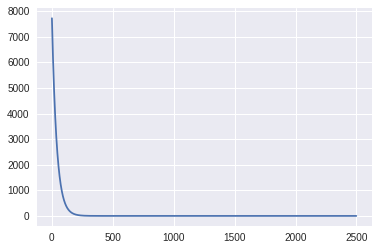

In [28]:
plt.plot(losses)